# Assignment 4: Classification with QDA, LDA, and Logistic Regression

Jim Xu

## Overview

In this assignment, you will make a new version of your ```NeuralNetwork``` class called ```NeuralNetworkClassifier```. You will then apply ```QDA```, ```LDA``` and your ```NeuralNetworkClassifier``` to a classification problem and discuss the results.  The ```tanh``` function will be used as the activation function for ```NeuralNetworkClassifier```.

### NeuralNetworkClassifier

Extends `NeuralNetwork` and rewrite the following methods:
```
class NeuralNetworkClassifier(NeuralNetwork):

    def _multinomialize(self, Y):
       
    def _objectiveF(self, w, X, Tindicators):
    
    def _gradientF(self, w, X, Tindicators):
        
    def train(self, X, T, nIterations=100, verbose=False,
              weightPrecision=0, errorPrecision=0, saveWeightsHistory=False):

    def use(self, X, allOutputs=False):
```

In [1]:
import numpy as np
import neuralnetworksA4 as nn

In [2]:
X = np.arange(10).reshape((-1, 1))
T = np.array([1]*5 + [2]*5).reshape((-1, 1))

In [3]:
netc = nn.NeuralNetworkClassifier(X.shape[1], [5, 5], len(np.unique(T)))
netc.train(X, T, 20)
print(netc)
print('T, Predicted')
print(np.hstack((T, netc.use(X))))

NeuralNetwork(1, [5, 5], 2)
   Network was trained for 21 iterations that took 0.0079 seconds. Final error is 0.0006412486109161482.
T, Predicted
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]


## ```partition``` function

Add the keyword parameter ```classification``` with a default value of ```False``` to your ```partition``` function.  When its value is set to ```True``` the ```partition``` function perform a stratified partitioning.

In [4]:
import mlutilities as ml
Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, 0.6, shuffle=False, classification=True)

In [5]:
Xtrain

array([[0],
       [1],
       [2],
       [5],
       [6],
       [7]])

In [6]:
Ttrain

array([[1],
       [1],
       [1],
       [2],
       [2],
       [2]])

In [7]:
Xtest

array([[3],
       [4],
       [8],
       [9]])

In [8]:
Ttest

array([[1],
       [1],
       [2],
       [2]])

## Printing a confusion matrix

### Example with toy data

Use the above data to compare QDA, LDA, and linear and nonlinear logistic regression.

In [9]:
import qdalda
qda = qdalda.QDA()
qda.train(Xtrain, Ttrain)
Ytrain = qda.use(Xtrain)
Ytest = qda.use(Xtest)

In [10]:
print(np.hstack((Ttrain, Ytrain)))

[[1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]


In [11]:
np.sum(Ttrain == Ytrain) / len(Ttrain) * 100

100.0

In [12]:
print(np.hstack((Ttest, Ytest)))

[[1 1]
 [1 2]
 [2 2]
 [2 2]]


In [13]:
np.sum(Ttest == Ytest) / len(Ttest) * 100

75.0

In [14]:
lda = qdalda.LDA()
lda.train(Xtrain, Ttrain)
Ytrain = lda.use(Xtrain)
Ytest = lda.use(Xtest)

In [15]:
print(np.hstack((Ttrain, Ytrain)))

[[1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]


In [16]:
print(np.hstack((Ttest, Ytest)))

[[1 1]
 [1 2]
 [2 2]
 [2 2]]


In [17]:
np.sum(Ttrain == Ytrain) / len(Ttrain) * 100

100.0

In [18]:
np.sum(Ttest == Ytest) / len(Ttest) * 100

75.0

In [19]:
ml.confusionMatrix(Ttrain, Ytrain, [1, 2]);

       1    2
    ------------
 1 |100.0  0  
 2 |  0  100.0


In [20]:
ml.confusionMatrix(Ttest, Ytest, [1, 2]);

       1    2
    ------------
 1 | 50.0 50.0
 2 |  0  100.0


In [21]:
netc = nn.NeuralNetworkClassifier(X.shape[1], [5, 5], len(np.unique(T)))
netc.train(Xtrain, Ttrain, 100)
print(netc)
print('T, Predicted')
Ytrain = netc.use(Xtrain)
Ytest = netc.use(Xtest)

NeuralNetwork(1, [5, 5], 2)
   Network was trained for 101 iterations that took 0.0372 seconds. Final error is -0.0.
T, Predicted


In [22]:
print(np.hstack((Ttrain, Ytrain)))

[[1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]


In [23]:
print(np.hstack((Ttest, Ytest)))

[[1 1]
 [1 2]
 [2 2]
 [2 2]]


In [24]:
np.sum(Ttrain == Ytrain) / len(Ttrain) * 100

100.0

In [25]:
np.sum(Ttest == Ytest) / len(Ttest) * 100

75.0

In [26]:
ml.confusionMatrix(Ttrain, Ytrain, [1, 2]);

       1    2
    ------------
 1 |100.0  0  
 2 |  0  100.0


In [27]:
ml.confusionMatrix(Ttest, Ytest, [1, 2]);

       1    2
    ------------
 1 | 50.0 50.0
 2 |  0  100.0


Remember that linear logistic regression can be applied by specifying 0 hidden units.

In [28]:
netc = nn.NeuralNetworkClassifier(X.shape[1], 0, len(np.unique(T)))
netc.train(Xtrain, Ttrain, 100)
print(netc)
print('T, Predicted')
Ytrain = netc.use(Xtrain)
Ytest = netc.use(Xtest)

NeuralNetwork(1, [], 2)
   Network was trained for 101 iterations that took 0.0176 seconds. Final error is 1.3164159347653214e-05.
T, Predicted


In [29]:
ml.confusionMatrix(Ttrain, Ytrain, [1, 2]);

       1    2
    ------------
 1 |100.0  0  
 2 |  0  100.0


In [30]:
ml.confusionMatrix(Ttest, Ytest, [1, 2]);

       1    2
    ------------
 1 | 50.0 50.0
 2 |  0  100.0


## Apply to data from orthopedic patients

Download ```column_3C_weka.csv``` from [Kaggle site](https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients).  

- pelvic_incidence
- pelvic_tilt
- lumbar_lordosis_angle
- sacral_slope
- pelvic_radius
- degree_spondylolisthesis
- class

The first two lines of the dataset looks like:
`
pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
63.0278175,22.55258597,39.60911701,40.47523153,98.67291675,-0.254399986,Hernia
39.05695098,10.06099147,25.01537822,28.99595951,114.4054254,4.564258645,Hernia
`

Use the column named ```class``` to create target class labels. Apply QDA, LDA, linear logistic regression, and nonlinear logistic regression to this data. Experiment with different hidden layer structures and numbers of iterations and discuss their performance.

In [31]:
import pandas as pd
import mlutilities as ml
import qdalda
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
data = pd.read_csv('column_3C_weka.csv')

In [33]:
data['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [34]:
targetMapping = {'Hernia':1, 'Normal':2, 'Spondylolisthesis':3}

In [35]:
data['class'] = data['class'].map(targetMapping)
data = data.as_matrix()
data.shape, type(data)

((310, 7), numpy.ndarray)

In [36]:
np.unique(data[:,6].reshape((-1,1)))

array([ 1.,  2.,  3.])

In [37]:
T = data[:,6].reshape((-1,1))
X = data[:,:6].astype(float)
X.shape, T.shape

((310, 6), (310, 1))

In [38]:
Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, 0.8, shuffle=True, classification=True)
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((248, 6), (248, 1), (62, 6), (62, 1))

In [39]:
hls = [0, [1], [5], [10], [1,1], [5,5], [10,10], [1,1,1,1,1], [5,5,5,5,5], [10,10,10,10,10]]
nIterations = [10, 100, 200, 500, 1000]
percentages = []
for i, hl in enumerate(hls):
    for j, nIter in enumerate(nIterations):
        Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, 0.8, shuffle=True, classification=True)
        netc = nn.NeuralNetworkClassifier(X.shape[1], hl, len(np.unique(T)))
        netc.train(Xtrain, Ttrain, nIter)
        Ytrain = netc.use(Xtrain)
        Ytest = netc.use(Xtest)
        percentages.append([hl, nIter] + [np.sum(Ttrain == Ytrain) / len(Ttrain) * 100, np.sum(Ttest == Ytest) / len(Ttest) * 100])

In [40]:
Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, 0.8, shuffle=True, classification=True)
qda = qdalda.QDA()
qda.train(Xtrain, Ttrain)
Ytrain = qda.use(Xtrain)
Ytest = qda.use(Xtest)
percentages.append(['neural network classifiers', 'QDA'] + [np.sum(Ttrain == Ytrain) / len(Ttrain) * 100, np.sum(Ttest == Ytest) / len(Ttest) * 100])

In [41]:
Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, 0.8, shuffle=True, classification=True)
lda = qdalda.LDA()
lda.train(Xtrain, Ttrain)
Ytrain = lda.use(Xtrain)
Ytest = lda.use(Xtest)
percentages.append(['neural network classifiers', 'LDA'] + [np.sum(Ttrain == Ytrain) / len(Ttrain) * 100, np.sum(Ttest == Ytest) / len(Ttest) * 100])

In [42]:
percentagespd2 = pd.DataFrame(percentages)
print(percentagespd2)

                             0     1           2          3
0                            0    10   85.080645  88.709677
1                            0   100   85.887097  87.096774
2                            0   200   86.290323  77.419355
3                            0   500   88.306452  83.870968
4                            0  1000   86.290323  82.258065
5                          [1]    10   61.693548  64.516129
6                          [1]   100   79.032258  77.419355
7                          [1]   200   81.451613  82.258065
8                          [1]   500   81.048387  74.193548
9                          [1]  1000   81.048387  80.645161
10                         [5]    10   88.709677  85.483871
11                         [5]   100   93.548387  87.096774
12                         [5]   200   92.741935  83.870968
13                         [5]   500   91.935484  83.870968
14                         [5]  1000   94.354839  79.032258
15                        [10]    10   8

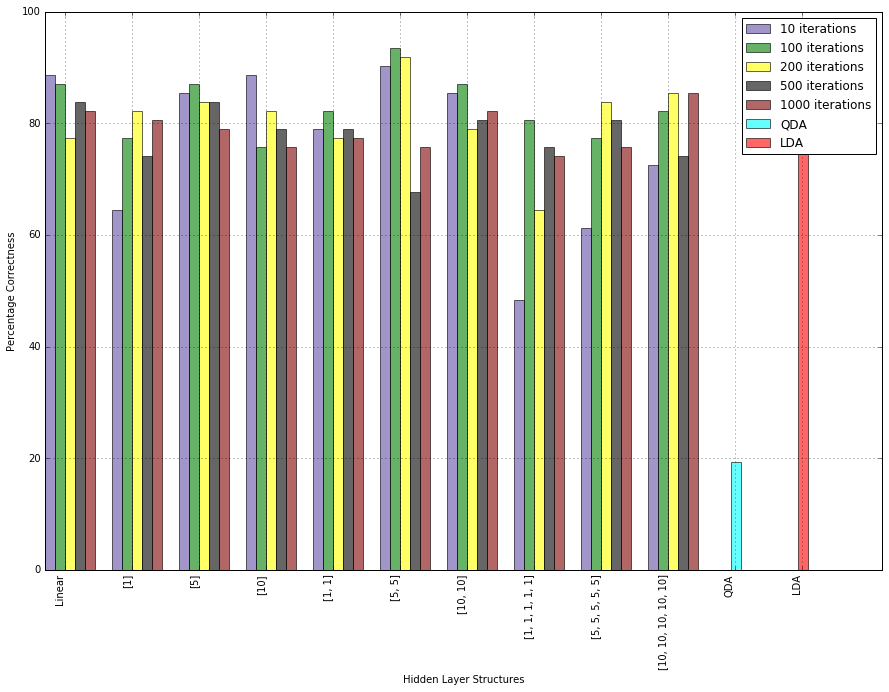

In [43]:
plt.figure(figsize=(15, 10))
xs = np.arange(0,50,5)
index = np.arange(0, 20, 2)
bar_width = 0.3
opacity = 0.6
colors = ['#624ea7', 'g', 'yellow', 'k', 'maroon']
for i, nIter in enumerate(nIterations):
    plt.bar(index+i*bar_width, percentagespd2.values[xs + i, 3], bar_width,\
            alpha=opacity ,label=str(nIter)+' iterations', color=colors[i])
plt.bar(20.5, percentagespd2.values[50, 3], bar_width,\
            alpha=opacity ,label='QDA', color='cyan')
plt.bar(22.5, percentagespd2.values[51, 3], bar_width,\
            alpha=opacity ,label='LDA', color='red')
plt.legend()
xlabels = ['Linear'] + hls[1:] + ['QDA', 'LDA']
xindexs = np.arange(0,24,2)
plt.xticks(xindexs+0.6, xlabels, rotation=90, horizontalalignment='right')
plt.xlabel('Hidden Layer Structures')
plt.ylabel('Percentage Correctness')
plt.ylim(ymin = 0, ymax = 100)

plt.grid(True)

plt.show()

Based on orthopedic patients dataset and runtime partition, the plot shows that `linear logistic regression` produces good enough correctness rate, around 80%. As to the `non-linear logistic regression`, `[5, 5]` hidden layer structure produces relatively higher correctness rate compared to other hidden layer structures. `[10, 10]` has slightly less peak correctness rate but has steadly performance across different iterations. `LDA` has 76% correctness rate while `QDA` only has 32% correctness rate on testing data.

In light of iterations times, larger number of iterations will generally improve the correctness rate on training data, but decreasing the correctness on testing data, which indicates a overfitting problem. For this particular dataset and runtime partition, `100` iterations generates highest correctness rate compared to `10, 200, 500, 1000`

In [44]:
classes = np.unique(T).astype(int)

In [45]:
hls = [0, [10,10]]
nIterations = [100]
for i, hl in enumerate(hls):
    for j, nIter in enumerate(nIterations):
        Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, 0.8, shuffle=True, classification=True)
        netc = nn.NeuralNetworkClassifier(X.shape[1], hl, len(np.unique(T)))
        netc.train(Xtrain, Ttrain, nIter)
        Ytrain = netc.use(Xtrain)
        Ytest = netc.use(Xtest)
        print(hl)
        _ = ml.confusionMatrix(Ttrain, Ytrain, classes)
        _ = ml.confusionMatrix(Ttest, Ytest, classes)
        print()

0
       1    2    3
    ------------------
 1 | 68.8 29.2  2.1
 2 | 12.5 85.0  2.5
 3 |  0.8  4.2 95.0
       1    2    3
    ------------------
 1 | 58.3 41.7  0  
 2 | 10.0 85.0  5.0
 3 |  3.3  3.3 93.3

[10, 10]
       1    2    3
    ------------------
 1 | 93.8  6.2  0  
 2 |  3.8 96.2  0  
 3 |  0    0  100.0
       1    2    3
    ------------------
 1 | 58.3 41.7  0  
 2 | 15.0 80.0  5.0
 3 |  3.3  6.7 90.0



In [64]:
print('QDA')
Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, 0.8, shuffle=True, classification=True)
qda = qdalda.QDA()
qda.train(Xtrain, Ttrain)
Ytrain = qda.use(Xtrain)
Ytest = qda.use(Xtest)
_ = ml.confusionMatrix(Ttrain, Ytrain, classes)
_ = ml.confusionMatrix(Ttest, Ytest, classes)

QDA
       1    2    3
    ------------------
 1 | 39.6 58.3  2.1
 2 |  3.8 93.8  2.5
 3 |  0    5.8 94.2
       1    2    3
    ------------------
 1 | 33.3 66.7  0  
 2 |  0   90.0 10.0
 3 |  0    3.3 96.7


In [65]:
print('LDA')
lda = qdalda.LDA()
lda.train(Xtrain, Ttrain)
Ytrain = lda.use(Xtrain)
Ytest = lda.use(Xtest)
_ = ml.confusionMatrix(Ttrain, Ytrain, classes)
_ = ml.confusionMatrix(Ttest, Ytest, classes)

LDA
       1    2    3
    ------------------
 1 | 85.4 14.6  0  
 2 | 20.0 71.2  8.8
 3 |  8.3  8.3 83.3
       1    2    3
    ------------------
 1 | 58.3 41.7  0  
 2 |  5.0 90.0  5.0
 3 |  3.3 13.3 83.3


In [66]:
targetMapping

{'Hernia': 1, 'Normal': 2, 'Spondylolisthesis': 3}

As we can see from the confusion matrix for four different neural network classifiers, namely, linear logistic regression, non-linear logistic regression, QDA, and LDA. They both have high correctness on predicting `Spondylolisthesis`, which still has some confusion over `Normal`. `Hernia` are generally badlly predicted, with high confusion over `Normal`. `Normal` are predicted in a good shape, but the major confusion it shares is with `Hernia`.

As to different neural network classifiers, non-linear logistic regression gives the best prediction results. Linear logistic regression does bad on predicting `Hernia`. QDA and LDA do bad on predicting `Hernia`. Things need to be noticed are that QDA fails on predicting more than half of the `Hernia` by mistaking it into half of `Normal` and half of `Spondylolisthesis`, and LDA does bad on predicting `Hernia` and `Spondylolisthesis`.

# Comparison with different activation function (ReLU)

In [67]:
netcR = nn.NeuralNetworkClassifierReLU(X.shape[1], hl, len(np.unique(T)))

In [69]:
hls = [0, [10,10]]
nIterations = [100]
percentages3 = []
for i, hl in enumerate(hls):
    for j, nIter in enumerate(nIterations):
        Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, 0.8, shuffle=True, classification=True)
        netc = nn.NeuralNetworkClassifier(X.shape[1], hl, len(np.unique(T)))
        netc.train(Xtrain, Ttrain, nIter)
        Ytrain = netc.use(Xtrain)
        Ytest = netc.use(Xtest)
        print(hl)
        _ = ml.confusionMatrix(Ttrain, Ytrain, classes)
        _ = ml.confusionMatrix(Ttest, Ytest, classes)
        percentages3.append([hl, nIter] + [np.sum(Ttrain == Ytrain) / len(Ttrain) * 100, np.sum(Ttest == Ytest) / len(Ttest) * 100])
        print()

0
       1    2    3
    ------------------
 1 | 68.8 31.2  0  
 2 | 13.8 83.8  2.5
 3 |  1.7  4.2 94.2
       1    2    3
    ------------------
 1 | 75.0 16.7  8.3
 2 | 15.0 80.0  5.0
 3 |  0    3.3 96.7

[10, 10]
       1    2    3
    ------------------
 1 | 93.8  6.2  0  
 2 |  5.0 95.0  0  
 3 |  0    0.8 99.2
       1    2    3
    ------------------
 1 | 66.7 33.3  0  
 2 |  5.0 75.0 20.0
 3 |  0    0  100.0



In [70]:
percentagespd3 = pd.DataFrame(percentages3)
print(percentagespd3)

          0    1          2          3
0         0  100  85.887097  87.096774
1  [10, 10]  100  96.774194  85.483871


Based on this dataset and my specific runtime partition, `ReLU` activation function gives similar performance using linear logistic regression model, which produces 87% correctness rate compared to 87 produced by `tanh` activation function. However, as to non-linear logistic regression model, `ReLU` only produces 85% correctness rate compared to 93% using `tanh`.

Note that this is runtime partition based data comparison, which could be different across different runs. My insights on this is both `tanh` and `ReLU` has similar good performance on this dataset, since they both produces around 90% correctness rate. Another reason is that they both suffer from the error when predicting `Hernia` and `Normal` while doing good when predicting `Spondylolisthesis`.